<h1>Version 2:Skill Extraction from documents</h1>
<h2> The code below identifies possible skills in the documents: </h2>

Importing libraries

In [1]:
import glob
import win32com.client
import unicodedata
import string
import nltk
from collections import Counter
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.corpus import stopwords

Reading Sample Resumes

In [2]:
CV_location, i , y ={} , 0 , u""

for files in glob.glob("D:\\Machine Learning\\Resumes\\*.doc*") :
    CV_location[i]=files
    i=i+1
    
for filename in CV_location.values():
    app = win32com.client.Dispatch('Word.Application')
    doc = app.Documents.Open(filename)
    x=doc.Content.Text
    y=y+x
app.Quit()

Removing non-ascii characters and converting unicode to text 

In [3]:
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)

document=unicodedata.normalize('NFKD', y).encode('ascii','ignore')
text=strip_non_ascii(document)

Identifying parts of speech of all words and keeping only the nouns 

In [4]:
tagged = nltk.pos_tag(nltk.word_tokenize(text))
phrases, phrase = [], ""
for (word, tag) in tagged:
    if tag[:3] == 'NNP':
        if phrase == "": phrase = word
        else: phrase += " " + word
    elif phrase != "":
        phrases.append(phrase.lower())
        phrase = ""

Separating Unigram, bigram and trigram from phrases list

In [5]:
unigram,bigram,trigram=[],[],[]     
for phrase_output in phrases:
    if len(phrase_output.split())==1:
        unigram.append(phrase_output)
    elif  len(phrase_output.split())==2:
        bigram.append(phrase_output)
    elif  len(phrase_output.split())==3:
        trigram.append(phrase_output)

Counting and Sorting the skill in descending order of their appearence

In [6]:
skills = Counter(unigram)
skills_bi = Counter(bigram)
skills_tri = Counter(trigram)
#sorting dictionary by values
Sorted_skills= sorted(skills.items(), key=lambda x: (-x[1], x[0]))
Sorted_skills_bi= sorted(skills_bi.items(), key=lambda p: (-p[1], p[0]))
Sorted_skills_tri= sorted(skills_tri.items(), key=lambda q: (-q[1], q[0]))

Removing dictionary words and words which occurred only once in the document

In [7]:
#Check if the word in in dictionary then remove
with open("D:\Machine Learning\English dictionary\English_Dictionary.txt") as word_file:
    english_words = set(word.strip().lower() for word in word_file)

def is_english_word(word):
    return word.lower() in english_words
    
HighFreq =[]
TechWordFerq=[]
#Names of Place, Company, Individual,Months needs to be removed
for item in Sorted_skills:
    if [s for s in Sorted_skills if is_english_word(item[0]) == False and item[1]>1]:
        HighFreq.append(item[0])
        TechWordFerq.append(item)

Tech_bigram=[]
for d, q in Sorted_skills_bi:
    y=d.split()
    if y[0] in HighFreq or y[1] in HighFreq :
        Tech_bigram.append((d,q))
        
Tech_trigram=[]
for k, l in Sorted_skills_tri:
    z=k.split()
    if z[0] in HighFreq or z[1] in HighFreq or z[2] in HighFreq:
        Tech_trigram.append((k,l))

Printing top 50 unigrams

In [8]:
import pandas as pd
headers=['Skill', 'Frequency']
df_uni = pd.DataFrame(TechWordFerq, columns=headers)
df_uni.head(50)[df_uni.columns[0:2]]

,Skill,Frequency
0,informatica,28
1,sql,28
2,etl,23
3,java,23
4,linux,23
5,c,20
6,alv,15
7,cognos,14
8,dhcp,14
9,dns,14


Printing top 50 bigrams

In [9]:
df_bi = pd.DataFrame(Tech_bigram, columns=headers)
df_bi.head(50)[df_bi.columns[0:2]]

,Skill,Frequency
0,sql server,18
1,windows xp,7
2,ibm cognos,6
3,soup ui,6
4,cisco routers,4
5,pl/sql developer,4
6,win xp,4
7,alv report,3
8,asm technologies,3
9,bdc program,3


Printing top 50 trigrams

In [10]:
df_tri = pd.DataFrame(Tech_trigram, columns=headers)
df_tri.head(50)[df_tri.columns[0:2]]

,Skill,Frequency
0,informatica power center,6
1,etl developer database,4
2,sql server role,4
3,bdc sap scripts,3
4,firewall disk management,2
5,gujarat ) designation,2
6,http web server,2
7,ibm websphere datastage,2
8,linux operating system,2
9,mumbai ) designation,2


Plotting top 15 identified unigram skills

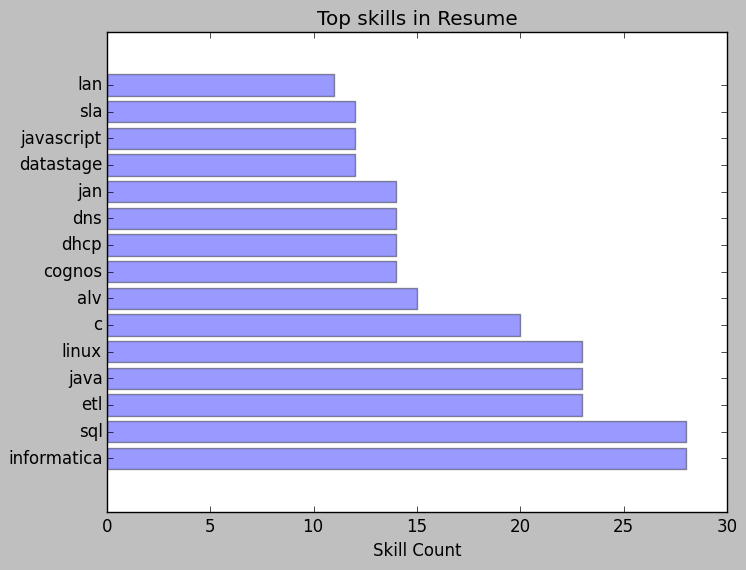

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

skill_name=[]
skill_count=[]
for point in TechWordFerq[:15]:
   skill_name.append(point[0])
   skill_count.append(point[1])

y_pos = np.arange(len(skill_name))

plt.barh(y_pos, skill_count, align='center', alpha=0.4)
plt.yticks(y_pos, skill_name)
plt.xlabel('Skill Count')
plt.title('Top skills in Resume')
plt.show()

Words that most commonly occur with the identified skills

In [12]:
words = [w.lower().lstrip('\x07').rstrip('?:!.,;') for w in text.split()]
bcf = BigramCollocationFinder.from_words(words)
stopset = set(stopwords.words('english'))
filter_stops = lambda w: len(w) < 2 or w in stopset
bcf.apply_word_filter(filter_stops)
bcf.apply_freq_filter(2)
#Finding collocation using Likelihood Ratio
collocation_likelihood_Ratio=bcf.nbest(BigramAssocMeasures.likelihood_ratio, 200)
#Finding collocation using Pointwise mutual information
collocation_pmi=bcf.nbest(BigramAssocMeasures.pmi, 200)
#Finding collocation using Student-t
collocation_student_t=bcf.nbest(BigramAssocMeasures.student_t, 200) 
#Finding collocation using chi-squared
collocation_chi_squared=bcf.nbest(BigramAssocMeasures.chi_sq, 200)

                   
def compare(s1, s2):
    remove = string.punctuation + string.whitespace
    return s1.translate(None, remove) == s2.translate(None, remove)


Skill_collocation_lk=[]
Skill_collocation_pmi=[]
Skill_collocation_st =[]
Skill_collocation_Chi_sq=[]
for z in HighFreq:
    #Likelihood Ratio
    for tup_lk in collocation_likelihood_Ratio:
        if compare(tup_lk[0],z.lower()) or compare(tup_lk[1],z.lower()) :
            Skill_collocation_lk.append(tup_lk)
    #Pointwise mutual information
    for tup_pmi in collocation_pmi:
        if compare(tup_pmi[0],z.lower()) or compare(tup_pmi[1],z.lower()) :
            Skill_collocation_pmi.append(tup_pmi)
    #chi-squared
    for tup_ck in collocation_chi_squared:
        if compare(tup_ck[0],z.lower()) or compare(tup_ck[1],z.lower()) :
            Skill_collocation_Chi_sq.append(tup_ck)
    #Student-t
    for tup_st in collocation_student_t:
        if compare(tup_st[0],z.lower()) or compare(tup_st[1],z.lower()) :
            Skill_collocation_st.append(tup_st)

Top 10 collocation using Likelihood Ratio

In [13]:
coll_header=['Word1', 'Word2']
df_lk = pd.DataFrame(Skill_collocation_lk, columns=coll_header)
df_lk.head(10)[df_lk.columns[0:2]]

,Word1,Word2
0,informatica,power
1,using,informatica
2,sql,server
3,alv,report
4,datastage,8.5
5,aegon,netherlands
6,windows,xp
7,html5,css3
8,fsd,enhancing
9,html5,css3


Top 10 collocation using Pointwise Mutual Information

In [14]:
df_pmi = pd.DataFrame(Skill_collocation_pmi, columns=coll_header)
df_pmi.head(10)[df_pmi.columns[0:2]]

,Word1,Word2
0,nfs,nis
1,igrp,ospf
2,nfs,nis
3,rhel,5.0
4,itnm,tem
5,tcr,itnm
6,vsat,rf
7,vsphere,5.1
8,wip,"om,bom"
9,inv,wip


Top 10 collocation using chi-squared

In [15]:
df_ch_sq = pd.DataFrame(Skill_collocation_Chi_sq, columns=coll_header)
df_ch_sq.head(10)[df_ch_sq.columns[0:2]]

,Word1,Word2
0,datastage,8.5
1,html5,css3
2,fsd,enhancing
3,html5,css3
4,nfs,nis
5,igrp,ospf
6,nfs,nis
7,itnm,tem
8,vsat,rf
9,vsphere,5.1


Top 10 collocation using Student-t

In [16]:
df_st = pd.DataFrame(Skill_collocation_st, columns=coll_header)
df_st.head(10)[df_st.columns[0:2]]

,Word1,Word2
0,using,informatica
1,informatica,power
2,sql,server
3,etl,developer
4,alv,report
5,ibm,cognos
6,datastage,8.5
7,oracle,database
8,windows,xp
9,xp,windows
